In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#Загружаем данные

In [4]:
data=pd.read_excel('Data_.xlsx')

In [5]:
data.head()

,ID,CAT_1,CAT_2,CAT_3,CAT_4,NUM_1,NUM_2,NUM_3,NUM_4,NUM_5,...,CAT_19,CAT_20,CAT_21,NUM_22,NUM_23,NUM_24,CAT_22,NUM_24.1,CAT_23,TARGET
0,1,1,1,1,0,0,0,0,0,0,...,0,0,1,827,110,0,0,0,25632.101911,170183.221394
1,2,1,1,1,0,0,576,1,1152,0,...,0,0,0,945,88,0,0,0,25644.458599,373167.413573
2,3,1,1,1,0,0,576,1,1152,0,...,0,0,1,714,177,0,0,0,25669.171975,129008.177510
3,4,1,2,1,0,0,64,1,64,0,...,1,0,0,68,1,0,0,0,25669.554140,157612.600437
4,5,1,1,1,1,0,49,1,49,2,...,0,0,0,19,131,0,0,2,25669.554140,114040.417817


ВИЗУАЛЬНЫЙ АНАЛИЗ

In [6]:
import seaborn as sns

In [7]:
#NUM_1

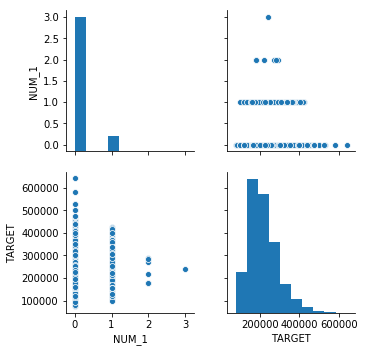

In [8]:
sns.pairplot(data[['NUM_1','TARGET']])

In [9]:
#Target нужно логарифмировать для приведения к нормальному распределению

In [10]:
data['log_target']=data['TARGET'].apply(lambda x: np.log(x))

In [11]:
data['NUM_1'].value_counts()

0    1387
1     162
2       7
3       1
Name: NUM_1, dtype: int64

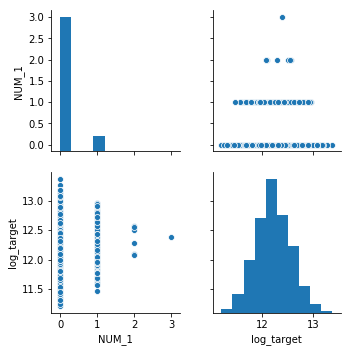

In [12]:
sns.pairplot(data[['NUM_1','log_target']])

In [13]:
#Средние равны- зависимости нет
#NUM_1 категориальная

In [14]:
#NUM_2

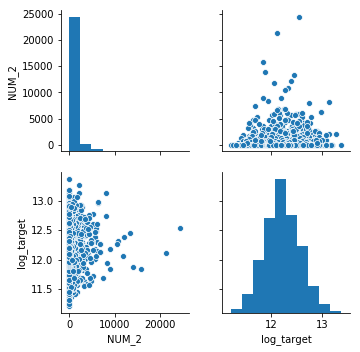

In [15]:
sns.pairplot(data[['NUM_2','log_target']])

In [16]:
#Наличие взаимосвязи не наблюдается
#Уберем выбросы

In [17]:
data['NUM_2']=[np.median(data['NUM_2']) if x>5000 else x for x in data['NUM_2']]

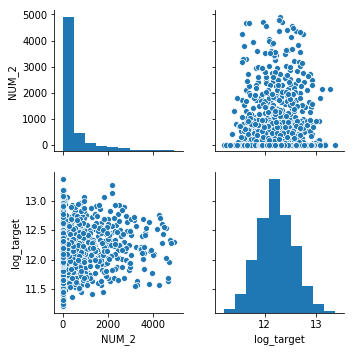

In [18]:
sns.pairplot(data[['NUM_2','log_target']])

In [19]:
#Зависимости не наблюдается

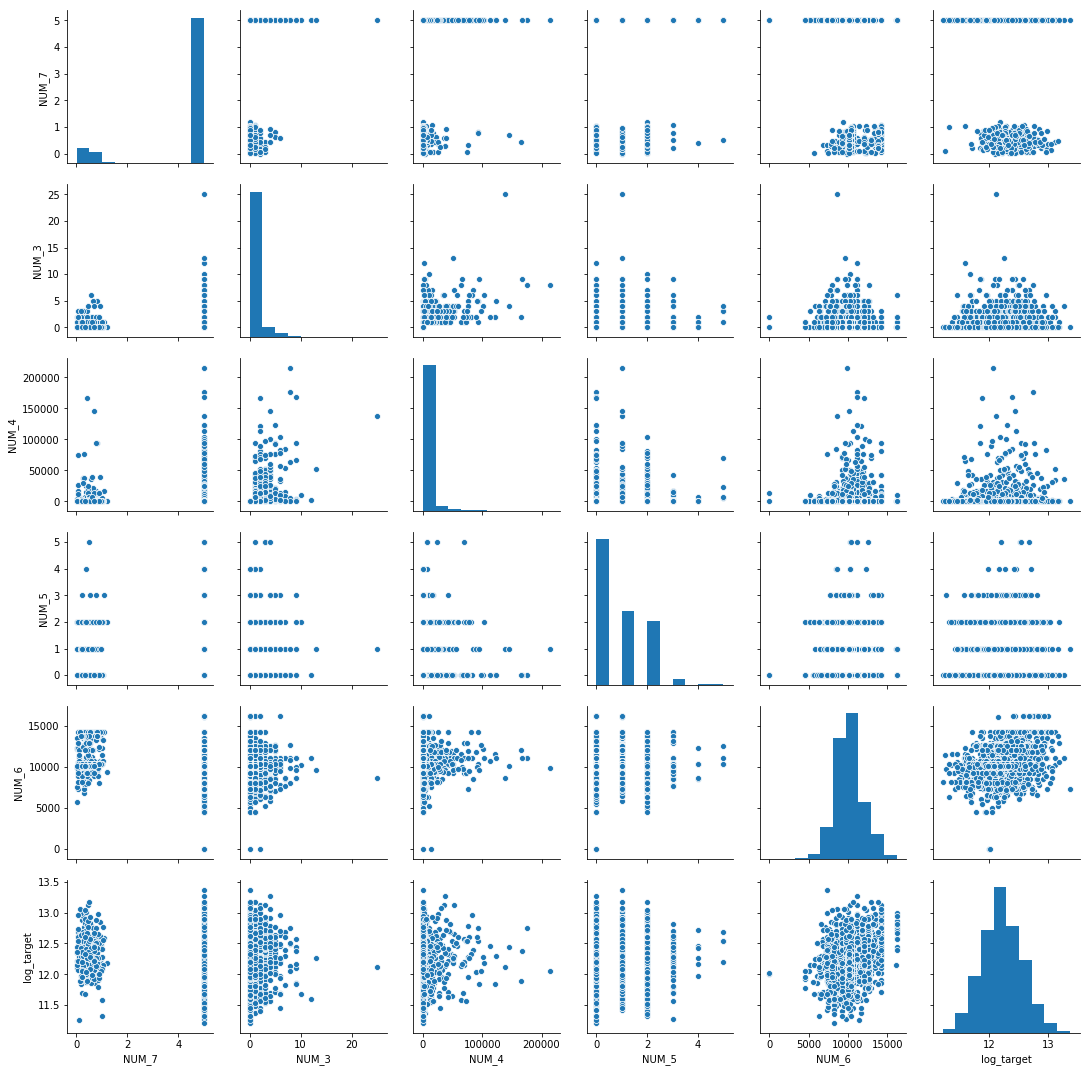

In [20]:
sns.pairplot(data[['NUM_7',
 'NUM_3',
 'NUM_4',
 'NUM_5',
 'NUM_6','log_target']])

In [21]:
#Взаимосвязи между переменными NUM 3-7 и Target не наблюдается
#NUM_5 категориальная

In [22]:
#Интерес вызывает NUM_6

In [23]:
data['NUM_6'].describe(percentiles=(0.01,0.99))

count     1557.000000
mean     10202.684008
std       1870.687356
min          0.000000
1%        6300.000000
50%      10000.000000
99%      14200.000000
max      16200.000000
Name: NUM_6, dtype: float64

In [24]:
#Надо почистить от выбросов

In [25]:
data=data[data['NUM_6']>=6300]

In [26]:
data=data[data['NUM_6']<=14200]

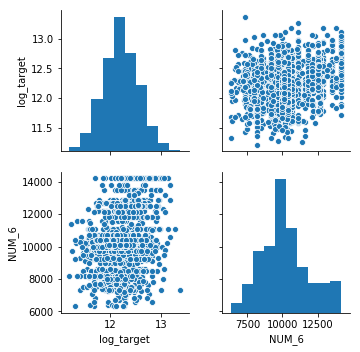

In [27]:
sns.pairplot(data[['log_target', 'NUM_6']])

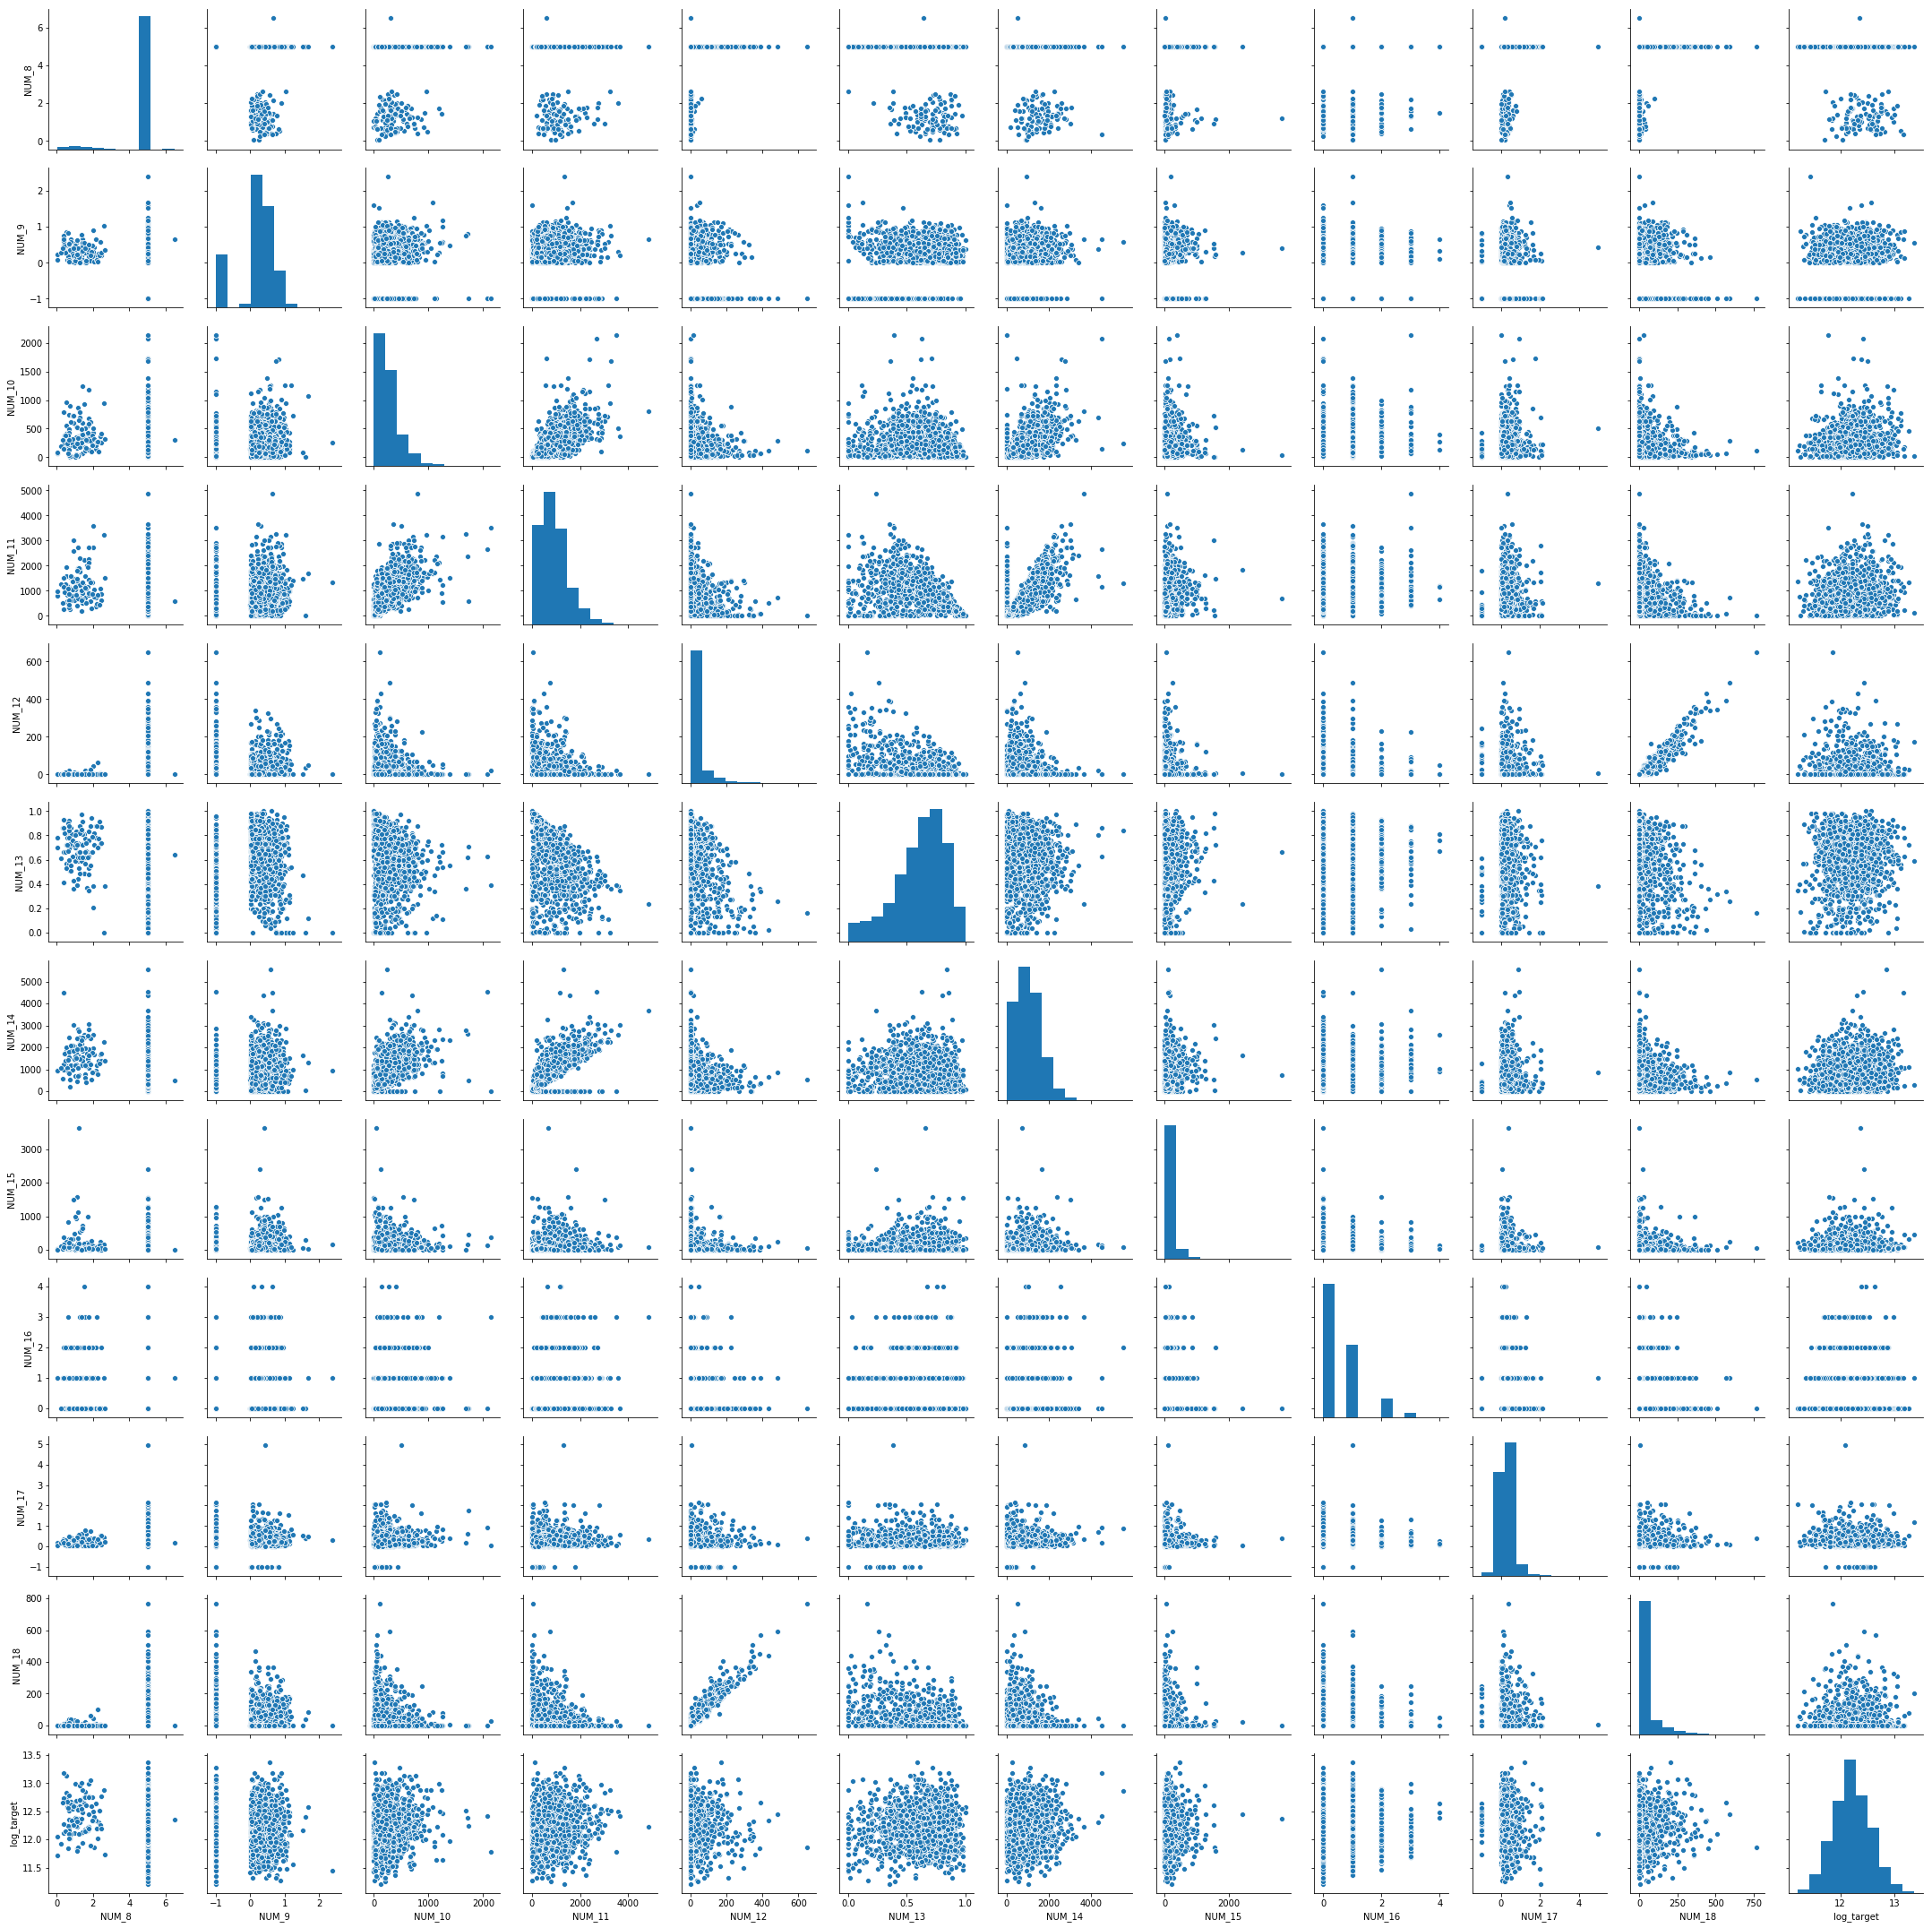

In [28]:
sns.pairplot(data[['NUM_8',
 'NUM_9',
 'NUM_10',
 'NUM_11',
 'NUM_12','NUM_13','NUM_14','NUM_15','NUM_16','NUM_17','NUM_18','log_target']])

In [29]:
#NUM_16 категориальная

In [30]:
#Вызывает интерес NUM_11

In [31]:
data['NUM_11'].describe(percentiles=(0.02,0.99))

count    1528.000000
mean      913.508567
std       611.409918
min         0.000000
2%          7.080000
50%       819.655000
99%      2824.389700
max      4853.790000
Name: NUM_11, dtype: float64

In [32]:
#Обработаем выбросы

In [33]:
data=data[data['NUM_11']<=2800]

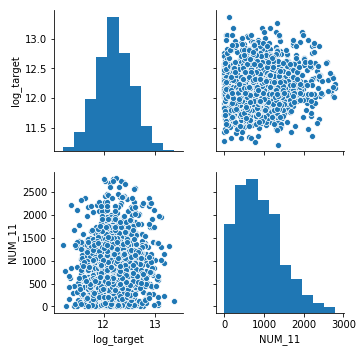

In [34]:
sns.pairplot(data[['log_target', 'NUM_11']])

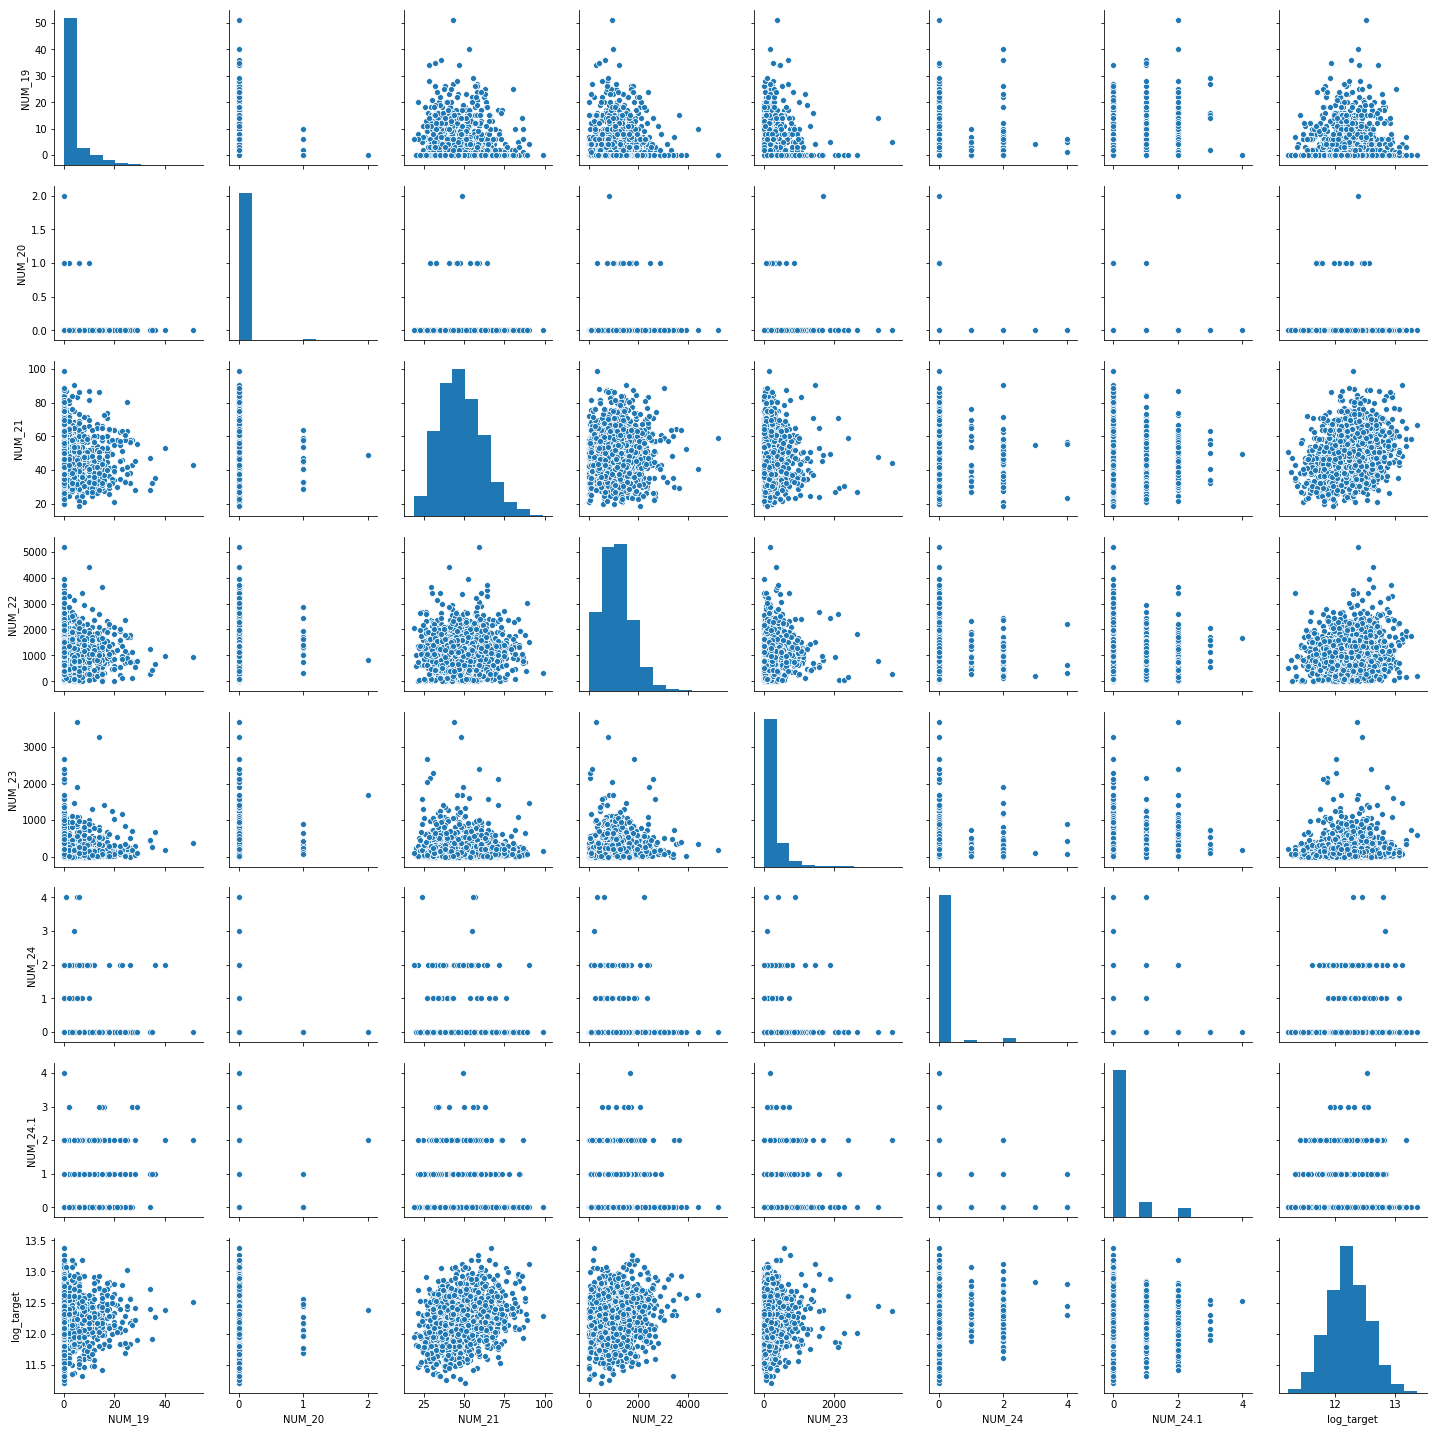

In [35]:
sns.pairplot(data[['NUM_19',
 'NUM_20',
 'NUM_21',
 'NUM_22',
 'NUM_23','NUM_24','NUM_24.1','log_target']])

In [36]:
#NUM_20, NUM24-24.1 категориальные

In [37]:
#NUM_21 вызывает интерес

In [38]:
data['NUM_21'].describe(percentiles=(0.01,0.99))

count    1512.000000
mean       48.049930
std        13.210473
min        18.736842
1%         23.602105
50%        46.947368
99%        83.111579
max        98.736842
Name: NUM_21, dtype: float64

In [39]:
data['NUM_21']=[np.log(x) for x in data['NUM_21']]

In [40]:
#NUM_22

In [41]:
data['NUM_22'].describe(percentiles=(0.05,0.99))

count    1512.000000
mean     1127.691138
std       642.918569
min         0.000000
5%        118.100000
50%      1083.000000
99%      2983.180000
max      5194.000000
Name: NUM_22, dtype: float64

In [42]:
#Уберем выбросы

In [43]:
data=data[data['NUM_22']<=3030]

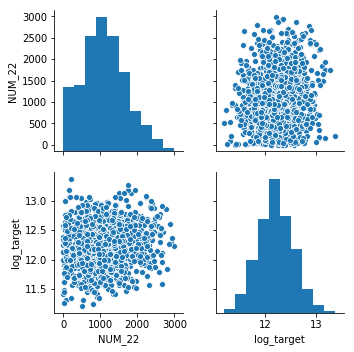

In [44]:
sns.pairplot(data[['NUM_22','log_target']])

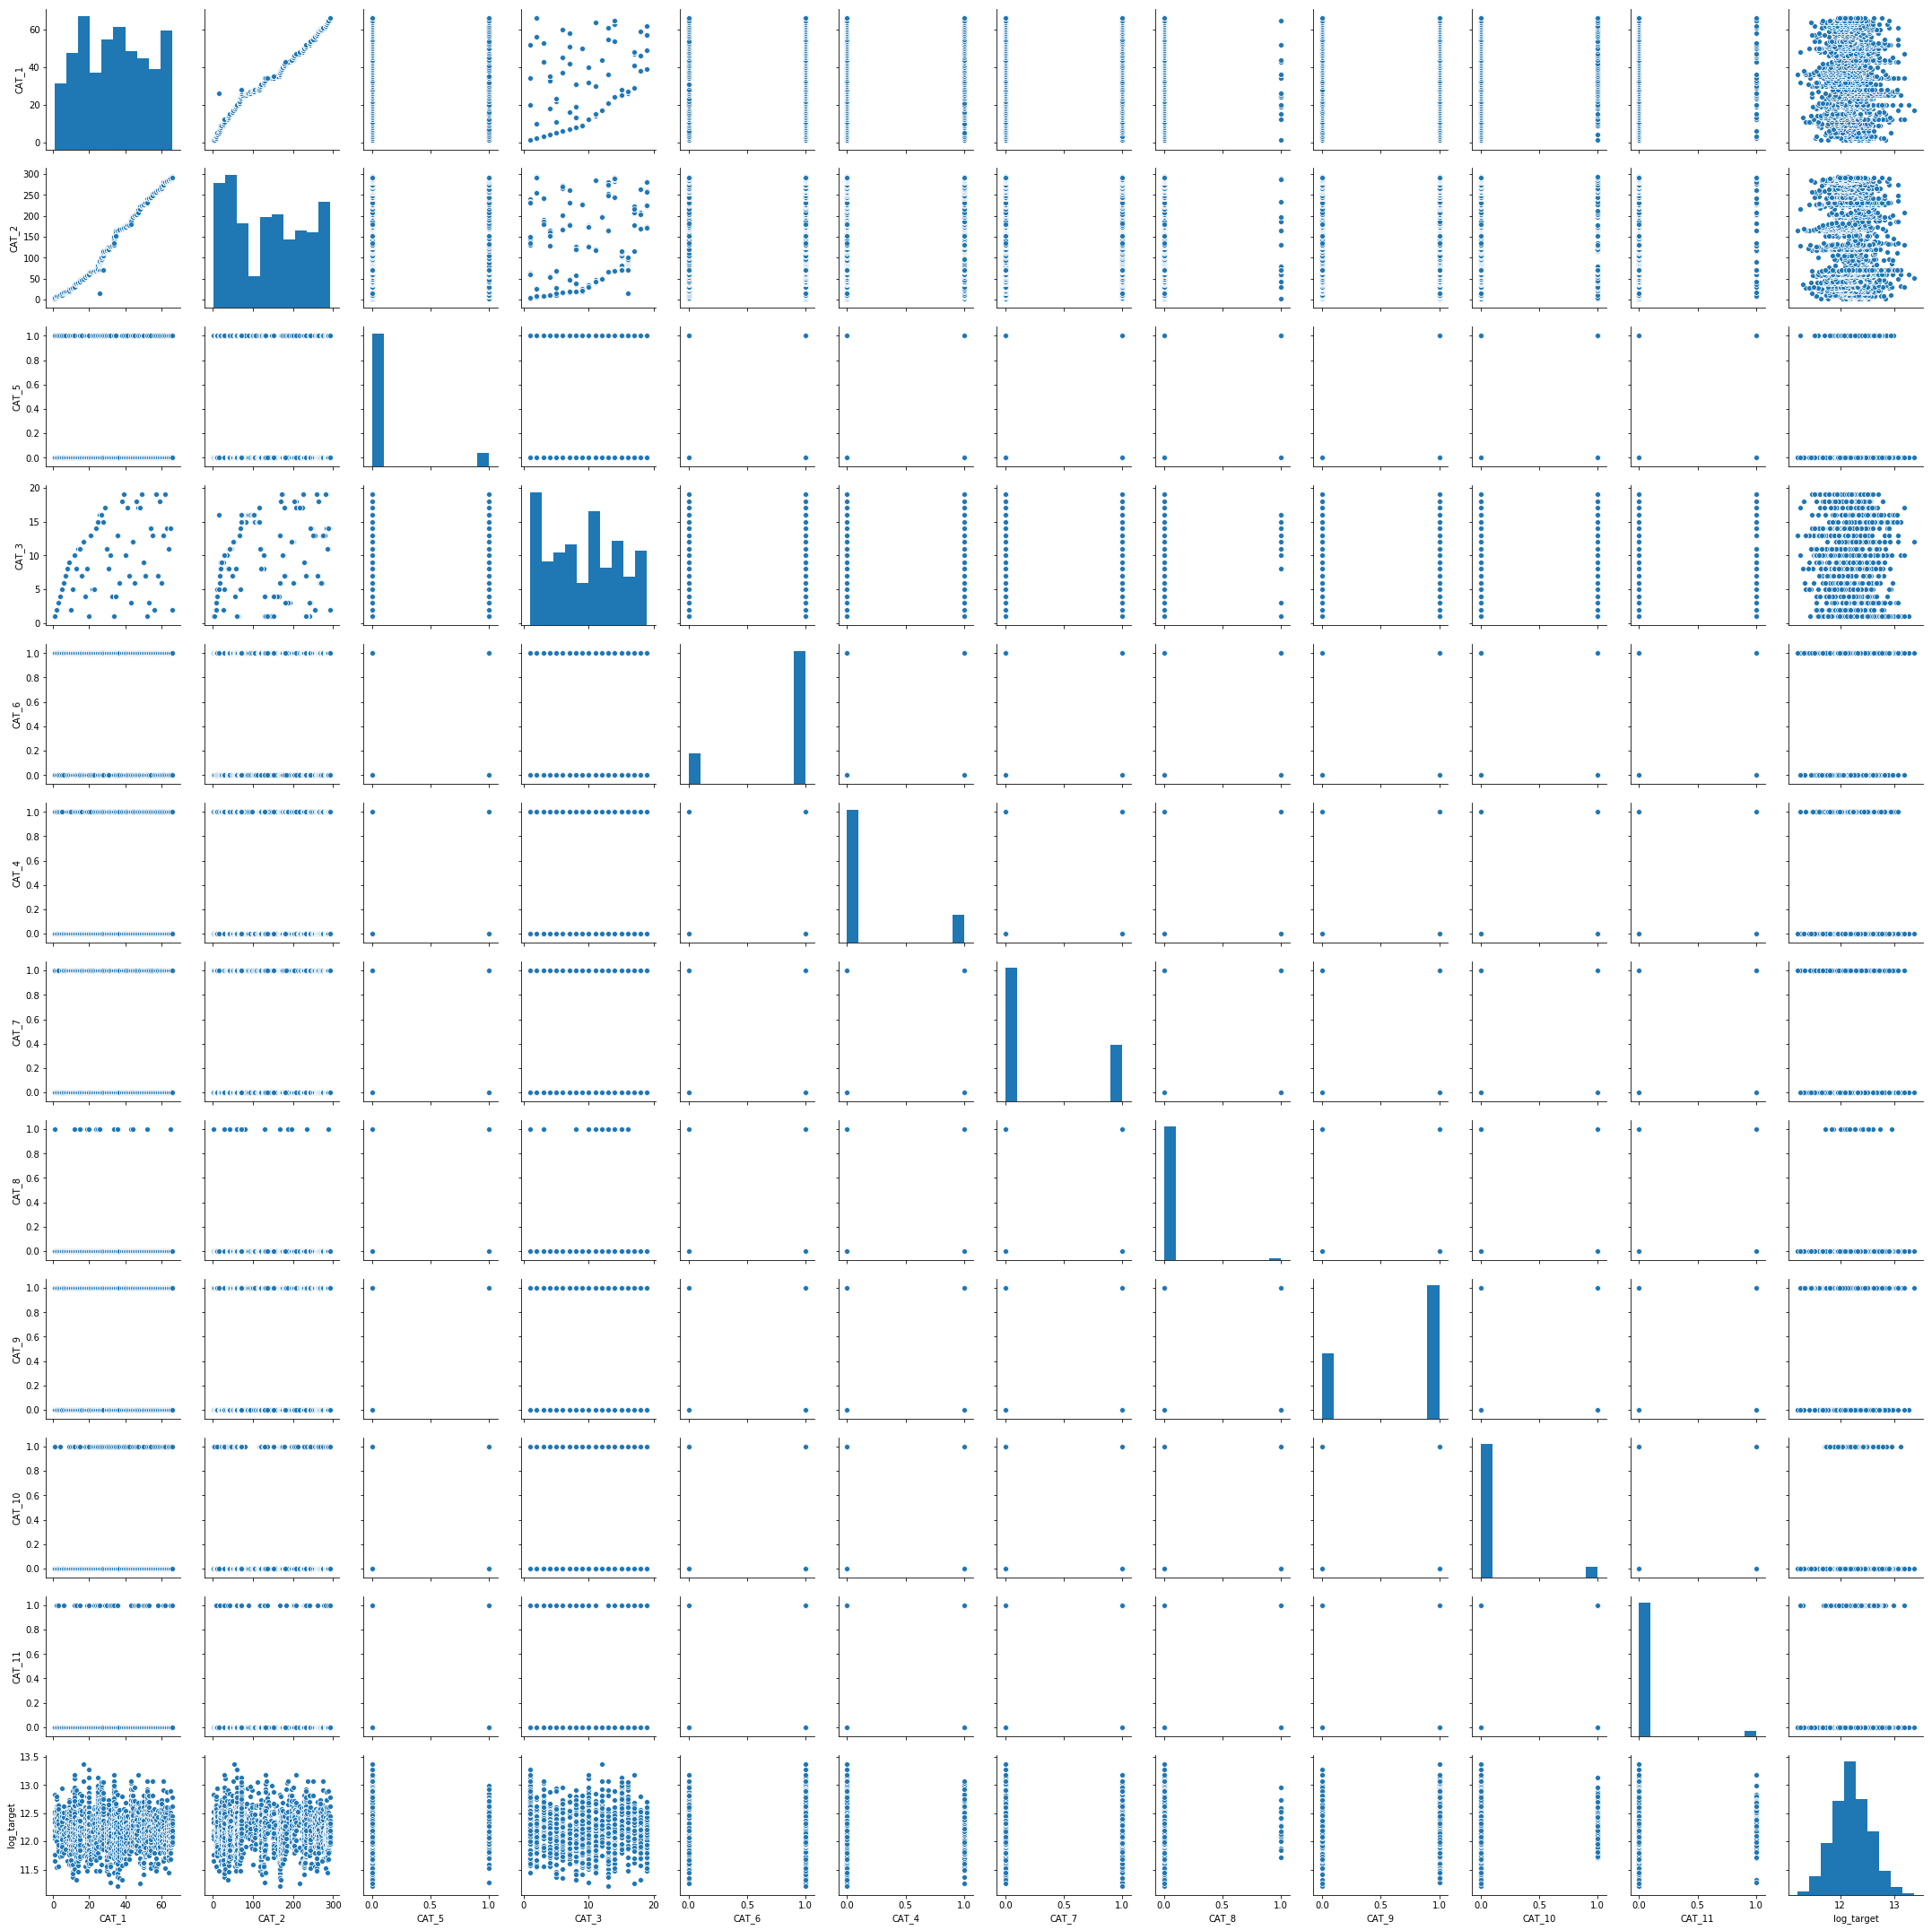

In [45]:
sns.pairplot(data[['CAT_1',
 'CAT_2','CAT_5',
 'CAT_3','CAT_6',
 'CAT_4','CAT_7',
 'CAT_8','CAT_9','CAT_10','CAT_11','log_target']])

In [46]:
#CAT 1-3 числовые

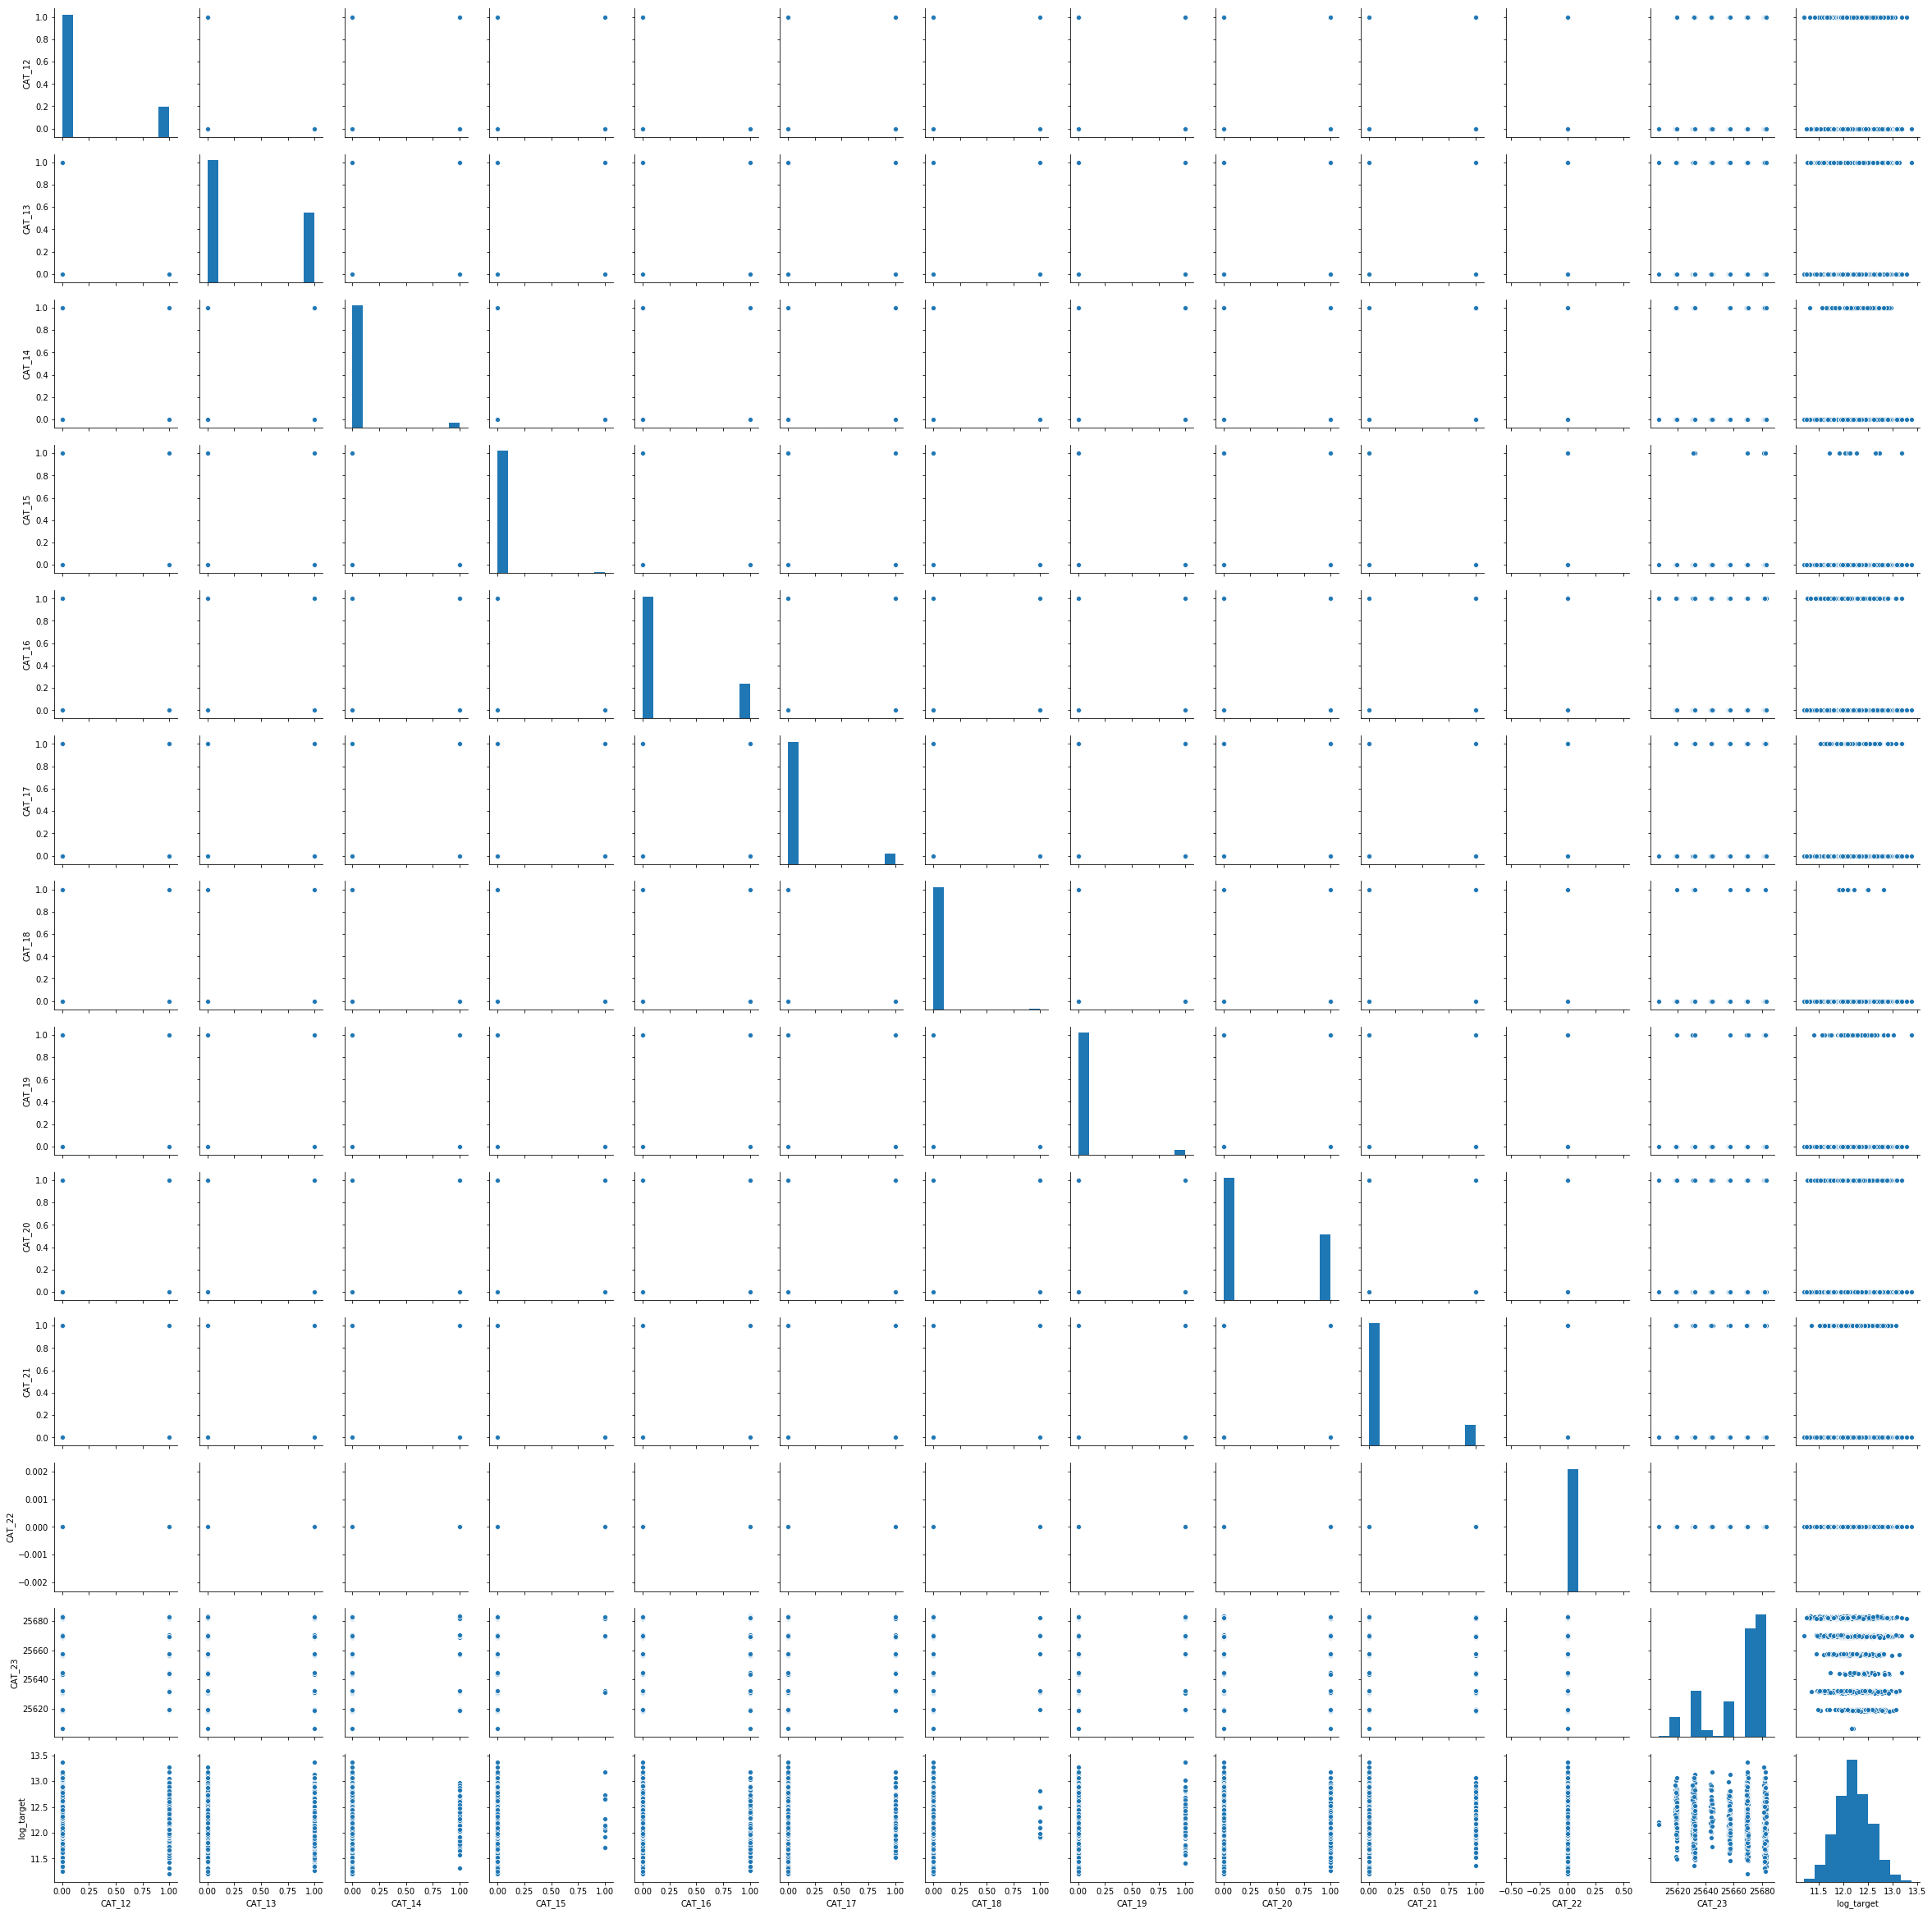

In [47]:
sns.pairplot(data[['CAT_12',
 'CAT_13','CAT_14',
 'CAT_15','CAT_16',
 'CAT_17','CAT_18',
 'CAT_19','CAT_20','CAT_21','CAT_22','CAT_23','log_target']])

In [48]:
#Визуально взаивсовязи между таргетом и переменными нет, даже бокс_плоты не нужны

In [49]:
#Посмотрим на коэффициенты корреляции, помним, что, они подразумевают наличие только линейной взаимосвязи

In [50]:
data.corr()['log_target'].sort_values(ascending=False)[:15]

log_target    1.000000
TARGET        0.972026
NUM_21        0.327205
NUM_6         0.264431
NUM_22        0.112354
NUM_1         0.092422
NUM_14        0.084660
CAT_6         0.081725
NUM_24        0.076727
CAT_21        0.073975
NUM_13        0.073963
NUM_11        0.067625
NUM_23        0.067197
NUM_10        0.061780
CAT_11        0.055260
Name: log_target, dtype: float64

#Линейная модель не даст хороших результатов, тк нет сильной линейной зависимости между переменными и таргетом. Плюс нужно будет бороться с мультиколлинеарностью

In [51]:
data.drop(['TARGET', 'ID'], axis=1, inplace=True)

In [52]:
y=data['log_target']
X=data.copy()
X.drop('log_target', axis=1, inplace=True)

In [53]:
an_columns=X.columns.tolist()

In [54]:
test=pd.read_excel('Data_.xlsx', sheet_name='Test')

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
clf=DecisionTreeRegressor()

In [57]:
clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
y_test=test['TARGET']

In [59]:
test.drop('TARGET', axis=1, inplace=True)

In [60]:
test.drop(['ID'], axis=1, inplace=True)

In [61]:
test['NUM_21']=[np.log(x) if x>0 else x for x in test['NUM_21']]

In [62]:
y_pred=clf.predict(test)

In [63]:
y_pred=np.exp(y_pred)

In [64]:
pd.DataFrame(y_pred/y_test).describe()

,TARGET
count,465.000000
mean,1.554454
std,0.750265
min,0.426814
25%,1.028457
50%,1.405764
75%,1.873263
max,5.073189


In [65]:
#Далее мы можем использовать PCA или удалять по 1 фактору в порядке возрастания их важности
#Сначала будем удалять

In [66]:
tab_importance=pd.concat([pd.DataFrame(X.columns.tolist()),pd.DataFrame(clf.feature_importances_)], axis=1)

In [67]:
tab_importance.columns=['features', 'importance']

In [68]:
feature_list=list(tab_importance.sort_values(by='importance')['features'].values)

In [69]:
X1=X.copy()
test1=test.copy()
for i in feature_list[:-1]:
    X1.drop(i, inplace=True, axis=1)
    test1.drop(i, inplace=True, axis=1)
    clf.fit(X1,y)
    y_pred=clf.predict(test1)
    y_pred=np.exp(y_pred)
    print (np.median(y_pred/y_test))

1.4637965768123231
1.4421058137720388
1.3940168582209944
1.4467075703936751
1.4093330939246642
1.4339431569248189
1.4312379386879424
1.3960075954304045
1.417346275012222
1.4319690672258514
1.4253470027935746
1.3812708309062114
1.4164811687730385
1.3878333293929588
1.4289787798526976
1.3824625361398668
1.3951814767471922
1.3797335199587446
1.3878333293929588
1.4425982668103536
1.417346275012222
1.4548125296713408
1.4514173483990824
1.4599077704045076
1.461074836679078
1.4702635764838723
1.4519894070707933
1.4525674702375073
1.4996696123392366
1.54308704661633
1.5378962635993279
1.5345436271262238
1.5314946658944066
1.4690669029635064
1.5396573542108465
1.4608090096705895
1.4407809676269856
1.4921386298043646
1.4315259816151178
1.3905032195743108
1.3905032195743108
1.3385898137533208
1.3562363143300777
1.321855862056105
1.3183328188457937
1.5115644390071274
1.5423603916886999


In [70]:
#Видим, что при оставлении 3-5 самых значимых факторах результат самый лучший

In [71]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1]).fit(X)
for i in range(1, X.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.982
n-components=2, explained variance 0.993
n-components=3, explained variance 0.996
n-components=4, explained variance 0.998
n-components=5, explained variance 0.999
n-components=6, explained variance 0.999
n-components=7, explained variance 1.000
n-components=8, explained variance 1.000
n-components=9, explained variance 1.000
n-components=10, explained variance 1.000
n-components=11, explained variance 1.000
n-components=12, explained variance 1.000
n-components=13, explained variance 1.000
n-components=14, explained variance 1.000
n-components=15, explained variance 1.000
n-components=16, explained variance 1.000
n-components=17, explained variance 1.000
n-components=18, explained variance 1.000
n-components=19, explained variance 1.000
n-components=20, explained variance 1.000
n-components=21, explained variance 1.000
n-components=22, explained variance 1.000
n-components=23, explained variance 1.000
n-components=24, explained variance 1.000
n

In [72]:
#Видим, что можем оставить 4-6 компонент

In [73]:
pca_model = PCA(n_components=4).fit(X)

In [74]:
pca_factors=pca_model.transform(X)

In [75]:
pca_test=pca_model.transform(test)

In [76]:
clf.fit(pca_factors,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [77]:
pd.DataFrame(y_pred/y_test).describe()

,TARGET
count,465.000000
mean,1.670684
std,0.632723
min,0.563577
25%,1.239641
50%,1.542360
75%,1.984613
max,4.766173


In [78]:
#PCA дал хуже результаты

In [79]:
#Результаты все равно неудовлетворительные

In [80]:
#Погенерим фичи из данных и поизменяем их еще

In [81]:
feature_list[-5:]

['NUM_11', 'NUM_23', 'CAT_23', 'NUM_6', 'NUM_21']

In [131]:
print(an_columns.index('NUM_11'))
print(an_columns.index('NUM_23'))
print(an_columns.index('CAT_23'))
print(an_columns.index('NUM_6'))
print(an_columns.index('NUM_21'))

21
43
47
9
38


In [83]:
X['NUM_6+NUM23']=X['NUM_6']*X['NUM_23']

In [84]:
test['NUM_6+NUM23']=test['NUM_6']*test['NUM_23']

In [85]:
X['target']=y

In [86]:
X.corr()['target'].sort_values(ascending=False).head(7)

target         1.000000
NUM_21         0.327205
NUM_6          0.264431
NUM_22         0.112354
NUM_1          0.092422
NUM_6+NUM23    0.090520
NUM_14         0.084660
Name: target, dtype: float64

In [87]:
X.drop('target', axis=1, inplace=True)

In [88]:
X.columns.tolist().index('NUM_6+NUM23')

48

In [132]:
clf.fit(X.iloc[:,[21,43,47,9,38,48]],y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [133]:
y_pred=clf.predict(test.iloc[:,[21,43,47,9,38,48]])

In [134]:
y_pred=np.exp(y_pred)

In [135]:
pd.DataFrame(y_pred/y_test).describe()

,TARGET
count,465.000000
mean,1.529898
std,0.660519
min,0.394188
25%,1.084561
50%,1.389388
75%,1.883987
max,6.137938


In [93]:
#При добавлении скомбинированного фактора стало хуже

In [94]:
#Масштабируем CAT_23

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [136]:
X['CAT_23']=scaler.fit_transform(np.array(X['CAT_23']).reshape(-1,1))

In [137]:
test['CAT_23']=scaler.transform(np.array(test['CAT_23']).reshape(-1,1))

In [138]:
clf.fit(X.iloc[:,[21,43,47,9,38]],y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [139]:
y_pred1=clf.predict(test.iloc[:,[21,43,47,9,38]])

In [140]:
y_pred1=np.exp(y_pred1)

In [141]:
pd.DataFrame(y_pred1/y_test).describe()

,TARGET
count,465.000000
mean,1.465013
std,0.642358
min,0.325565
25%,1.016007
50%,1.356236
75%,1.809347
max,4.812498


In [102]:
#хуже не стало, но и лучше тоже. CAT23 оставим в масштабе для чувствительных к этому моделей

In [103]:
#Попробуем добавить кластеры

In [142]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=0).fit(X)

In [143]:
X['cluster']=kmeans.predict(X)

In [144]:
test['cluster']=kmeans.predict(test)

In [145]:
clf.fit(X.iloc[:,[21,43,47,9,38,49]],y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [146]:
y_pred=clf.predict(test.iloc[:,[21,43,47,9,38,49]])

In [147]:
y_pred=np.exp(y_pred)

In [148]:
pd.DataFrame(y_pred/y_test).describe()

,TARGET
count,465.000000
mean,1.454974
std,0.626424
min,0.325565
25%,1.000457
50%,1.377870
75%,1.779312
max,4.708687


In [111]:
#Попробуем другие модели

In [112]:
import xgboost

In [113]:
from xgboost import XGBRegressor

In [114]:
xboost=XGBRegressor(max_depth=20,learning_rate=0.035)

In [149]:
xboost.fit(X.iloc[:,[21,43,47,9,38,49]],y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.035, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [150]:
y_pred=xboost.predict(test.iloc[:,[21,43,47,9,38,49]])

In [151]:
y_pred=np.exp(y_pred)

In [152]:
pd.DataFrame(y_pred/y_test).describe(percentiles=(0.25,0.75))

,TARGET
count,465.000000
mean,1.037187
std,0.356745
min,0.395484
25%,0.789321
50%,0.975423
75%,1.233067
max,3.101723


In [119]:
#xgboost сработал лучше

In [120]:
#используем gridsearch для поиска стабильной модели

In [121]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[10,15,20], 'learning_rate':[0.02,0.025,0.03,0.035, 0.04], 'min_child_weight':[1,2,3],'reg_lambda':[1,1.1,1.2]}

In [122]:
xboost_check=XGBRegressor(n_jobs=-1)

In [164]:
grid_cv = GridSearchCV(xboost_check, parameters, cv=5)
grid_cv.fit(X, y)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [10, 15, 20], 'learning_rate': [0.02, 0.025, 0.03, 0.035, 0.04], 'min_child_weight': [1, 2, 3], 'reg_lambda': [1, 1.1, 1.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
grid_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [166]:
best_model=grid_cv.best_estimator_

In [168]:
best_model.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [170]:
y_pred=best_model.predict(test)

In [171]:
y_pred=np.exp(y_pred)

In [172]:
pd.DataFrame(y_pred/y_test).describe(percentiles=(0.15,0.7))

,TARGET
count,465.000000
mean,1.224236
std,0.423171
min,0.451563
15%,0.831039
50%,1.138646
70%,1.381736
max,3.397731


In [130]:
#В большинстве случаев предсказывает больше, чем, нужно

In [173]:
tab_importance=pd.concat([pd.DataFrame(X.columns.tolist()),pd.DataFrame(best_model.feature_importances_)], axis=1)

In [174]:
tab_importance.columns=['features', 'importance']

In [175]:
feature_list=list(tab_importance.sort_values(by='importance')['features'].values)

In [176]:
X1=X.copy()
test1=test.copy()
for i in feature_list[:-1]:
    X1.drop(i, inplace=True, axis=1)
    test1.drop(i, inplace=True, axis=1)
    best_model.fit(X1,y)
    y_pred=best_model.predict(test1)
    y_pred=np.exp(y_pred)
    print (np.median(y_pred/y_test))

1.1386463384373477
1.1386463384373477
1.1386463384373477
1.1386463384373477
1.1401866776389813
1.1455879767372643
1.132600929057356
1.13121381216535
1.1373463636849728
1.1313510320667197
1.1318308461452435
1.1339171388821991
1.1356793282561426
1.1459178593471764
1.1278918069967885
1.1361955204798386
1.1298602540954703
1.1345798509617948
1.1396212814337294
1.1279146886801035
1.1371771861388724
1.1369119767264702
1.128076296315009
1.1279444999392694
1.1435514345596554
1.1369959751354815
1.1301910975737082
1.1286644043763137
1.1483627966673178
1.1434972386119613
1.147441893522819
1.1351534092617048
1.1159222815466359
1.1225607343317037
1.0995944989659143
1.1046428498294034
1.1094961461410688
1.0825907937256185
1.0940796830873234
1.1152228167857232
1.093478256596995
1.0938357209407021
1.121617947945164
1.0947676196265097
1.0839151276619792
1.0967227006957445
1.073077056342699
1.2940300643605436
1.305068001284097


In [185]:
feature_list[-6:]

['NUM_17', 'NUM_9', 'NUM_13', 'CAT_23', 'NUM_10', 'NUM_21']

In [186]:
print(an_columns.index('CAT_23'))
print(an_columns.index('NUM_10'))
print(an_columns.index('NUM_21'))
print(an_columns.index('NUM_9'))
print(an_columns.index('NUM_13'))
print(an_columns.index('NUM_17'))

47
20
38
14
23
31


In [195]:
best_model.fit(X.iloc[:,[47,20,38,14,23,31]],y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=10, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [196]:
y_pred=best_model.predict(test.iloc[:,[47,20,38,14,23,31]])

In [197]:
y_pred=np.exp(y_pred)

In [198]:
pd.DataFrame(y_pred/y_test).describe(percentiles=(0.15,0.7))

,TARGET
count,465.000000
mean,1.155556
std,0.398052
min,0.385626
15%,0.784199
50%,1.094095
70%,1.317885
max,3.360373
